In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

X_Guys=np.load('/content/drive/MyDrive/healthcare data/X_Guys.npy')
X_HH=np.load('/content/drive/MyDrive/healthcare data/X_HH.npy')
X_IOP=np.load('/content/drive/MyDrive/healthcare data/X_IOP.npy')

print(len(X_Guys)+len(X_HH)+len(X_IOP))

Mounted at /content/drive
564


In [2]:
np.random.seed(2718281828)
permutation_Guys=np.random.permutation(len(X_Guys))
permutation_HH=np.random.permutation(len(X_HH))
permutation_IOP=np.random.permutation(len(X_IOP))

X_Guys=X_Guys[permutation_Guys]
X_HH=X_HH[permutation_HH]
X_IOP=X_IOP[permutation_IOP]

n=33

X_Guys=X_Guys[:n+1]
X_HH=X_HH[:n]
X_IOP=X_IOP[:n]

In [3]:
x=[X_Guys,X_HH,X_IOP]

def centring(X):
    epsilon = 1e-7 # To prevent division by 0
    mean=np.mean(X)
    std=np.std(X)+epsilon
    X=(X-mean)/std
    return X

x_centred=[centring(y) for y in x]

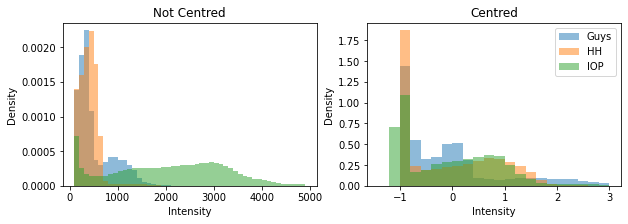

In [4]:
import matplotlib.pyplot as plt
labels=['Guys','HH','IOP']
_,axs=plt.subplots(1,2,figsize=(10,3))
axs[0].set_title('Not Centred')
axs[1].set_title('Centred')
bins=list(range(100,5000,100))
for i in range(3):
    axs[0].hist(x[i].flatten(),bins,density=True,alpha=0.5,label=labels[i])
axs[0].set_xlabel('Intensity')
axs[0].set_ylabel('Density')
bins=[i*0.2 for i in range(-7,16)]
#c,b=intensities1[i]
for i in range(3):
    axs[1].hist(x_centred[i].flatten(),bins,density=True,alpha=0.5,label=labels[i])
axs[1].set_xlabel('Intensity')
axs[1].set_ylabel('Density')
plt.legend()
plt.savefig('/content/drive/MyDrive/DLiH images/centring.png')

In [5]:
import torch
!pip install torchio
import torchio as tio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.7/172.7 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.3.2
    Uninstalling rich-13.3.2:
      Successfully uninstalled rich-13.3.2


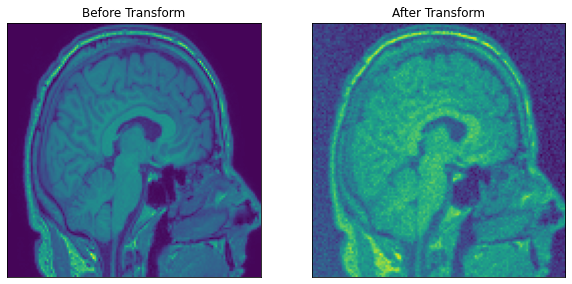

In [7]:
image=torch.Tensor(x_centred[0][0].reshape(1,40,128,128))
transform=tio.Compose([tio.RandomBiasField(coefficients=0.1),tio.RandomBlur(std=1),tio.RandomNoise(),tio.RandomGamma()])
_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].set_title('Before Transform')
axs[1].set_title('After Transform')
axs[0].imshow(np.rot90(image.detach().numpy()[0,20,:,:]))
axs[1].imshow(np.rot90(transform(image).detach().numpy()[0,20,:,:]))
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
plt.savefig('/content/drive/MyDrive/DLiH images/transform.png')